In [2]:
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Welcome to JupyROOT 6.16/00


In [3]:
back = '/afs/cern.ch/user/s/sraj/public/data_folder/back.root'
signal = '/afs/cern.ch/user/s/sraj/public/data_folder/signal.root'
out_dir = '/afs/cern.ch/user/s/sraj/public/plot'
#Calling out the folder in which the data is stored
treeName_back ="tagsDumper/trees/thq_125_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
           'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
          'jet1_phi',
         'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e'
          ]


#Data is converted to array
mc_arr = root2array(back, treeName_back, columns)
data_arr = root2array(signal, treeName_signal, columns)


signal = rec2array(data_arr)
backgr = rec2array(mc_arr)


In [6]:
# Variables = [CMS_hgg_mass,
#             sigmaMoM_decorr
#             'dipho_sumpt',
#             'dipho_cosphi',
#             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
#            ]



SyntaxError: invalid syntax (<ipython-input-6-f69a2906e8ec>, line 3)

In [7]:
##Define X and y from the given files
X = np.concatenate((signal, backgr))
Y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))

Corelation Matrix Plot

In [8]:
# Create a pandas DataFrame for our data
# this provides many convenience functions
# for exploring your dataset
# need to reshape y so it is a 2D array with one column
df = pd.DataFrame(np.hstack((X, Y.reshape(Y.shape[0], -1))),
                  columns=columns+['y'])

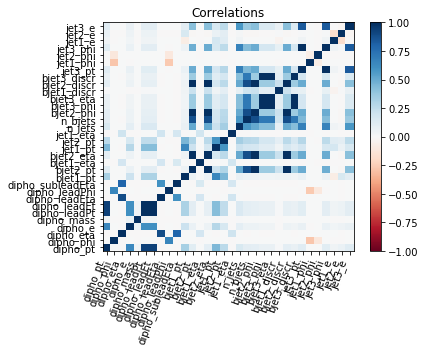

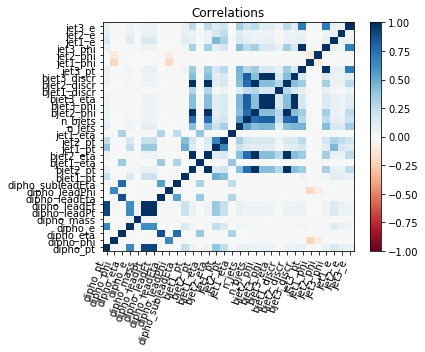

In [15]:
#correlation Matrix
bg = df.y <0.5
sig = df.y > 0.5

def correlations(data, **kwds):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr(**kwds)
    
    fig ,ax1 = plt.subplots(ncols =1, figsize=(6,5))
    
    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin' : -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)
    
    ax1.set_title("Correlations")
    
    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)
        
    plt.tight_layout()
#     plt.savefig("new_correlation.png")
# remove the y column from the correlation matrix
# after using it to select background and signal
correlations(df[bg].drop('y', 1))
correlations(df[sig].drop('y', 1))   

     
        
    

In [18]:
r =numpy.random.rand(X.shape[0])
# Get training and testing samples, splitting in half (using 0.5)
Xtrain=X[r>0.5]
Xtest=X[r<=0.5]   
Ytrain=Y[r>0.5]
Ytest=Y[r<=0.5] 


In [ ]:
X_dev,X_eval, y_dev,y_eval = train_test_split(X, Y,
                                              test_size=0.33, random_state=10)
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X_dev, y_dev,
                                                  test_size=0.33, random_state=100)

In [ ]:
# Create and run the SVC with an rbf kernel 
# Some tuning has been done to get the gamma and C values. 
# method_sklearn = SVC(C = 1.0, kernel = 'rbf',tol=0.001,gamma=0.005) 
# method_sklearn.fit(Xtrain,Ytrain) 

In [19]:
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.


In [ ]:
#define model for training
clf = Sequential()
clf.add(Dropout(3,input_shape = (19,)))
clf.add(Dense(200, activation = 'relu', kernel_initializer = 'lecun_uniform', kernel_constraint=maxnorm(3),name = 'dense_1'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',kernel_constraint=maxnorm(3), name = 'dense_2'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',kernel_constraint=maxnorm(3), name = 'dense_3'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', kernel_constraint=maxnorm(3),name = 'dense_4'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', kernel_constraint=maxnorm(3),name = 'dense_5'))
#Output
clf.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model
clf.compile(loss = 'binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])
# print(clf.summary())
# plot_model(clf, to_file='clf_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
clf.fit(Xtrain, Ytrain, epochs = 20, batch_size= 900, validation_split = 0.25)

In [ ]:
# Final evaluation of the model for DNN
scores = clf.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# Final evaluation of the model for DNN
scores = clf.evaluate(Xtrain, Ytrain, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict_proba(Xtest)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Ytest, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("ROC_curve.png")
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_accuracy.png')
plt.show()
# summarize history for loss
plt.plot(h.history[￼'loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('loss.png')
plt.show()

In [ ]:
%%capture cap --no-stderr
print('scores')
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(Xtest)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Ytest==0]
tSig = tTest[Ytest==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$f(t)$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=True, )
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=True, alpha=0.5)
# plt.savefig('output1.png')
plt.show()

In [ ]:
Classifier_training_S = clf.predict_proba(Xtrain[Ytrain>0.5]).ravel()
Classifier_training_B = clf.predict_proba(Xtrain[Ytrain<0.5]).ravel() 
Classifier_testing_S = clf.predict_proba(Xtest[Ytest>0.5]).ravel()
Classifier_testing_B = clf.predict_proba(Xtest[Ytest<0.5]).ravel()

In [ ]:
# This will be the min/max of our plots
c_max = 2.0
c_min = -2.0


In [ ]:
# Get histograms of the classifiers
Histo_training_S = numpy.histogram(Classifier_training_S,bins=40,range=(c_min,c_max))
Histo_training_B = numpy.histogram(Classifier_training_B,bins=40,range=(c_min,c_max))
Histo_testing_S = numpy.histogram(Classifier_testing_S,bins=40,range=(c_min,c_max))
Histo_testing_B = numpy.histogram(Classifier_testing_B,bins=40,range=(c_min,c_max))

In [ ]:
# Lets get the min/max of the Histograms
AllHistos= [Histo_training_S,Histo_training_B,Histo_testing_S,Histo_testing_B]
h_max = max([histo[0].max() for histo in AllHistos])*1.2
h_min = max([histo[0].min() for histo in AllHistos])

In [ ]:
# Get the histogram properties (binning, widths, centers)
bin_edges = Histo_training_S[1]
bin_centers = ( bin_edges[:-1] + bin_edges[1:]  ) /2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])
 

In [ ]:
# To make error bar plots for the data, take the Poisson uncertainty sqrt(N)
ErrorBar_testing_S = numpy.sqrt(Histo_testing_S[0])
ErrorBar_testing_B = numpy.sqrt(Histo_testing_B[0])
 

In [ ]:
# Draw objects
ax1 = plt.subplot(111)
# Draw solid histograms for the training data
ax1.bar(bin_centers-bin_widths/2.,Histo_training_S[0],facecolor='blue',linewidth=0,width=bin_widths,label='S (Train)',alpha=0.5)
ax1.bar(bin_centers-bin_widths/2.,Histo_training_B[0],facecolor='red',linewidth=0,width=bin_widths,label='B (Train)',alpha=0.5)


# # Draw error-bar histograms for the testing data
ax1.errorbar(bin_centers, Histo_testing_S[0], yerr=ErrorBar_testing_S, xerr=None, ecolor='blue',c='blue',fmt='o',label='S (Test)')
ax1.errorbar(bin_centers, Histo_testing_B[0], yerr=ErrorBar_testing_B, xerr=None, ecolor='red',c='red',fmt='o',label='B (Test)')
 
# Make a colorful backdrop to show the clasification regions in red and blue
ax1.axvspan(0.0, c_max, color='blue',alpha=0.08)
ax1.axvspan(c_min,0.0, color='red',alpha=0.08)
 
# Adjust the axis boundaries (just cosmetic)
ax1.axis([c_min, c_max, h_min, h_max])
 
# Make labels and title
plt.title("Classification with scikit-learn")
# plt.xlabel("Classifier, SVM [rbf kernel, C=1, gamma=0.005]")
plt.ylabel("Counts/Bin")
 
# Make legend with smalll font
legend = ax1.legend(loc='upper center', shadow=True,ncol=2)
for alabel in legend.get_texts():
            alabel.set_fontsize('small')
 
# Save the result to png
# plt.savefig("Sklearn_example.png")
